<a href="https://colab.research.google.com/github/kuku2005/deepanshu.github.io/blob/main/A_Quantum_Random_Number_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a Quantum Random Number Generator with Q\# and Qiskit!

## Table of contents
1. [Define the problem](#define-the-problem)
2. [Define the Random Number Generator Logic](#define-random-number)
3. [Write a Random Bit Generator](#define-random-number)
4. [Taking a look at the code](#take-a-look)
5. [Visualize the Q# Code with the Bloch Sphere](#take-a-look)
6. [Creating a Complete Random Number Generator](#complete-random-number)
* [Optional - Creating a similar solution wtih Qiskit](#qiskit-similar)

**Note**: Items 1–6 have been adapted from the [Azure Quantum tutorial on building a quantum random number generator](https://learn.microsoft.com/en-us/azure/quantum/tutorial-qdk-quantum-random-number-generator?tabs=tabid-python).

<a name='define-the-problem'></a>
## Define the problem

Classical computers don't produce random numbers, but rather pseudorandom numbers. A pseudorandom number generator generates a deterministic sequence of numbers based on some initial value, called a seed. To better approximate random values, this seed is often the current time from the CPU's clock.

Quantum computers, on the other hand, can generate truly random numbers. This is because the measurement of a qubit in superposition is a probabilistic process. The result of the measurement is random, and there's no way to predict the outcome. This is the basic principle of quantum random number generators.

A qubit is a unit of quantum information that can be in superposition. When measured, a qubit can only be either in the 0 state or in the 1 state. However, before measurement, the state of the qubit represents the probability of reading either a 0 or a 1 with a measurement.

You start by taking a qubit in a basis state, for example zero. The first step of the random number generator is to use a Hadamard operation to put the qubit into an equal superposition. The measurement of this state results in a zero or a one with 50% probability of each outcome, a truly random bit.

There's no way of knowing what you will get after the measurement of the qubit in superposition, and the result is a different value each time the code is invoked. But how can you use this behavior to generate larger random numbers?

Let's say you repeat the process four times, generating this sequence of binary digits: $0, 1, 1, 0$

If you concatenate, or combine, these bits into a bit string, you can form a larger number. In this example, the bit sequence $0, 1, 1, 0$ is equivalent to six in decimal.

> $0110_{binary} = 6_{decimal}$

If you repeat this process many times, you can combine multiple bits to form any large number. Now you can provide your superior with that number as a secure password, since you can be sure that no space hacker could determine the results of the sequence of measurements.



In [ ]:
!pip install --upgrade --quiet qiskit qiskit-aer qsharp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.7 MB/s eta 0:00:00


<a name='define-random-number'></a>
## Define the Random Number Generator Logic

Let's outline the logic of a random number generator, assuming we have a random bit generator:

1. Define `max` as the maximum number you want to generate.
2. Calculate the number of random bits needed (`nBits`) to represent integers up to `max`.
3. Generate a random bit string of length `nBits`.
4. If the bit string represents a number greater than `max`, go back to step 3.
5. Return the generated number as an integer.

For example, set `max = 12`. You need 4 bits to represent a number between 0 and 12.

- First, generate the bit string `1101`, which equals 13. Since 13 > 12, repeat the process.
- Next, generate `0110`, which equals 6. Since 6 ≤ 12, the process is complete.

The quantum random number generator will return 6. In practice, setting a larger maximum makes it more secure. You can also use ASCII encoding to create passwords with numbers, symbols, and mixed-case letters.

## Write a Random Bit Generator

The first step is writing a Q# operation to generate a random bit. This operation serves as a building block for the random number generator.

In [ ]:
import qsharp

In [ ]:
%%qsharp

operation GenerateRandomBit() : Result {
    // Allocate a qubit.
    use q = Qubit();

    // Set the qubit into superposition of 0 and 1 using the Hadamard
    H(q);

    // At this point the qubit `q` has 50% chance of being measured in the
    // |0〉 state and 50% chance of being measured in the |1〉 state.
    // Measure the qubit value using the `M` operation, and store the
    // measurement value in the `result` variable.
    let result = M(q);

    // Reset qubit to the |0〉 state.
    // Qubits must be in the |0〉 state by the time they are released.
    Reset(q);

    // Return the result of the measurement.
    return result;
}

<a name='take-a-look'></a>
## Now Take a Look at the Code

- You define the `GenerateRandomBit` operation, which produces a `Result` type (either `Zero` or `One`).
- A single qubit is allocated using the `use` keyword. It starts in the `Zero` state.
- The `H` operation places the qubit in an equal superposition.
- The `M` operation measures the qubit, returning `Zero` or `One`.
- The `Reset` operation returns the qubit to the `|0〉` state.

By placing the qubit in superposition and measuring it, you get different results each time.

## Visualize the Q# Code with the Bloch Sphere

In the Bloch sphere, the north pole represents `0`, and the south pole represents `1`. A superposition can be visualized as a point on the sphere, and the closer the arrow is to a pole, the higher the probability that the qubit collapses to the corresponding classical value upon measurement.

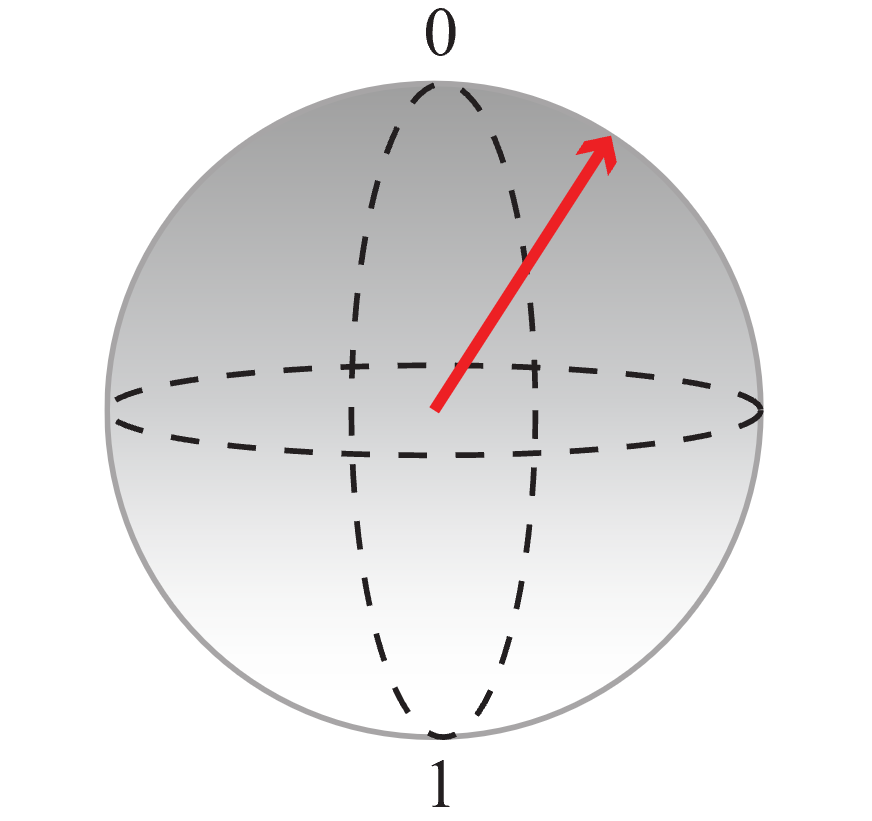

## Visualizing the Code

You can use this representation to understand the code:

1. Start with a qubit initialized in state `0` and apply the `H` operation to create an equal superposition where the probabilities of `0` and `1` are the same.

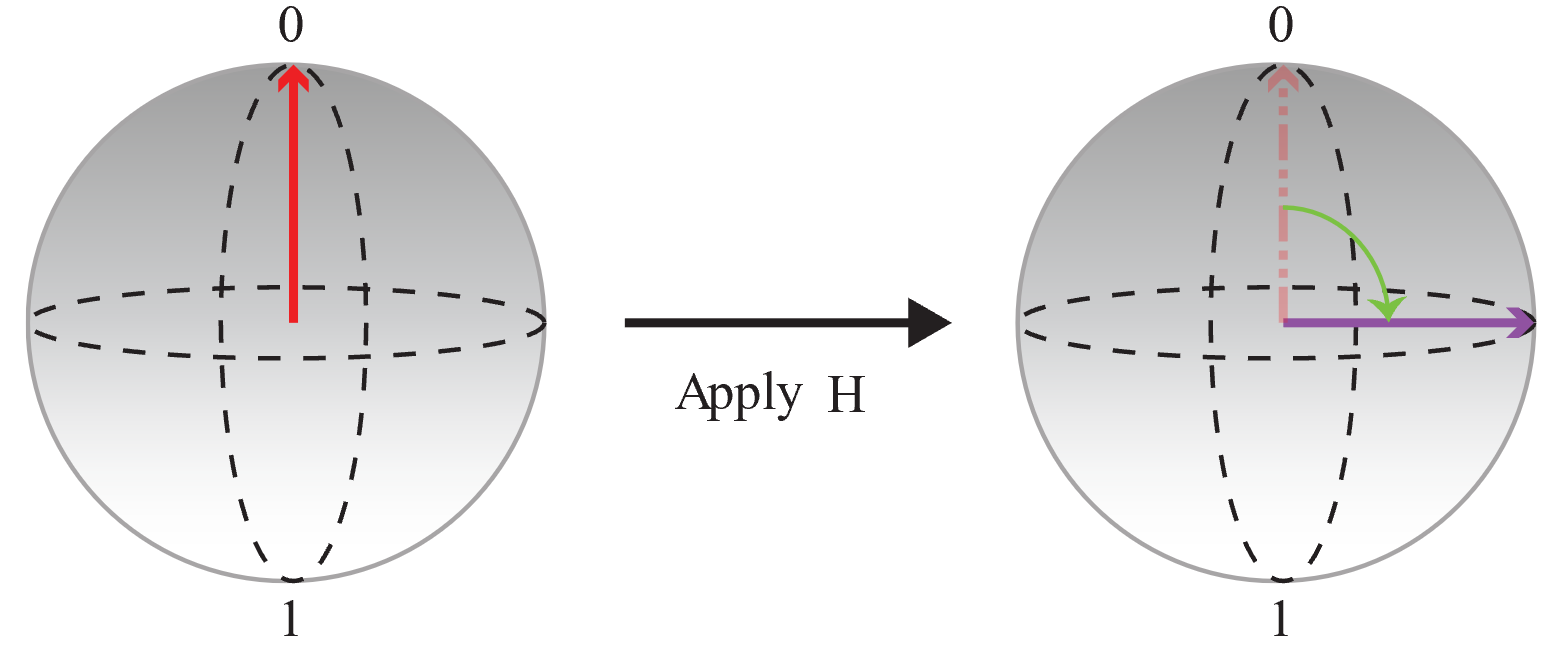   

2. Measure the qubit and store the result.

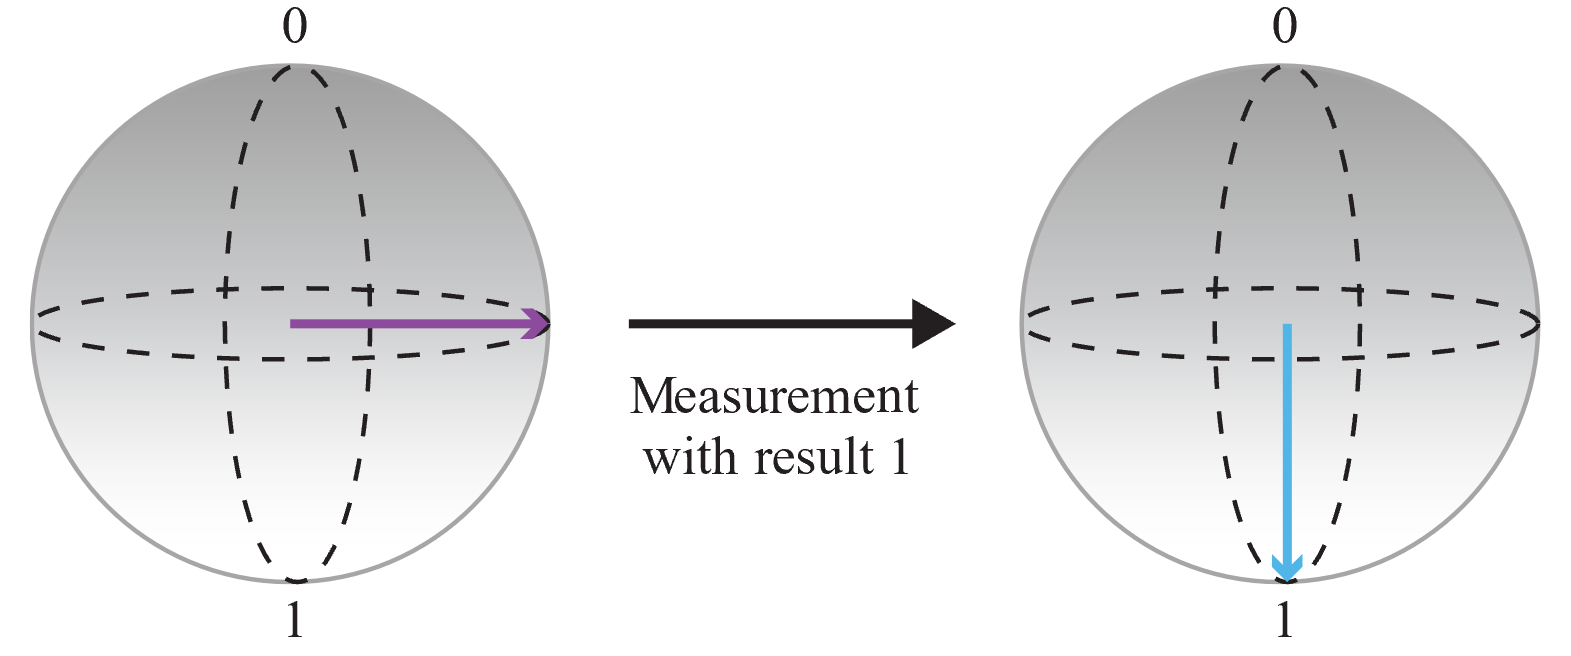

Since the outcome of the measurement is random, and the probabilities of measuring `0` and `1` are the same, you obtain a completely random bit. You can repeat this operation multiple times to create integers. For example, by calling the operation three times, you generate three random bits, which can form a random 3-bit number (a number between 0 and 7).

<a name='complete-random-number'></a>
## Creating a Complete Random Number Generator

1. First, you need to add the required Q# namespaces to the program. For the complete random number generator, you need to include three Q# namespaces: `Microsoft.Quantum.Math`, `Microsoft.Quantum.Intrinsic`, and `Microsoft.Quantum.Convert`.

```
open Microsoft.Quantum.Convert;
open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Math;
```

2. Next, you define the `GenerateRandomNumberInRange` operation. This operation repeatedly calls the `GenerateRandomBit` operation to build a string of bits.



```
/// Generates a random number between 0 and `max`.
operation GenerateRandomNumberInRange(max : Int) : Int {
    // Determine the number of bits needed to represent `max` and store it
    // in the `nBits` variable. Then generate `nBits` random bits which will
    // represent the generated random number.
    mutable bits = [];
    let nBits = BitSizeI(max);
    for idxBit in 1..nBits {
        set bits += [GenerateRandomBit()];
    }
    let sample = ResultArrayAsInt(bits);

    // Return random number if it is within the requested range.
    // Generate it again if it is outside the range.
    return sample > max ? GenerateRandomNumberInRange(max) | sample;
    }
```



Let's take a moment to review the new code.

* **Calculating the Range Size**: The operation begins by computing `range = max - min + 1`, which determines the number of possible integer values between `min` and `max`, inclusive.

* **Determining the Number of Bits Needed**: The `BitSizeI` function from the `Microsoft.Quantum.Math` namespace is used to calculate `nBits`, the number of bits required to represent the integer `range - 1`. This ensures that the generated random number can cover the entire desired range.

* **Generating Random Bits**: The operation declares a mutable array `bits` to store random bits. A for loop is used to generate `nBits` random bits by repeatedly calling `GenerateRandomBit()` and appending the result to `bits` using the `set` directive.

* **Converting Bits to Integer**: The `ResultArrayAsInt` function from the `Microsoft.Quantum.Convert` namespace converts the array of random bits into a positive integer `sample`.

* **Ensuring the Sample is Within Range**: If `sample` is greater than or equal to `range`, the operation recursively calls itself to generate a new random number. This ensures uniform randomness within the specified range.

* **Adjusting the Sample to the Desired Range**: If the `sample` is within the range, the operation returns `min + sample`, adjusting the random number to fall between `min` and `max`.

3. **Adding an Entry Point**: Finally, an entry point operation, typically named `Main`, is added to the program. This `Main` operation calls `GenerateRandomNumberInRange` to generate a random number between `min` and `max`.


```
@EntryPoint()
operation Main() : Int {
    let min = 0;
    let max = 100;
    ////Message($"Sampling a random number between {min} and {max}: ");

    // Generate a random number in the min..max range.
    return GenerateRandomNumberInRange(min, max);
}
```

Run the cell below that contains the complete code!

In [ ]:
%%qsharp

open Microsoft.Quantum.Convert;
open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Math;

@EntryPoint()
operation Main() : Int {
    let min = 0;                                                          //// <- Enter a minimum value here!
    let max = 100;                                                        //// <- Enter a maximum value here!
    ////Message($"Sampling a random number between {min} and {max}: ");

    // Generate a random number in the min..max range.
    return GenerateRandomNumberInRange(min, max);
}

/// # Summary
/// Generates a random number between `min` and `max`.
operation GenerateRandomNumberInRange(min : Int, max : Int) : Int {
    // Calculate the range size.
    let range = max - min + 1;

    // Determine the number of bits needed to represent `range - 1`.
    mutable bits = [];
    let nBits = BitSizeI(range - 1);

    // Generate `nBits` random bits.
    for idxBit in 1..nBits {
        set bits += [GenerateRandomBit()];
    }
    let sample = ResultArrayAsInt(bits);

    // If the sample is outside the range, generate a new one.
    if sample >= range {
        return GenerateRandomNumberInRange(min, max);
    } else {
        // Adjust the sample to the desired range.
        return min + sample;
    }
}

/// # Summary
/// Generates a random bit.
operation GenerateRandomBit() : Result {
    // Allocate a qubit.
    use q = Qubit();

    // Put the qubit into a superposition of |0⟩ and |1⟩.
    H(q);

    // Measure the qubit and store the result.
    let result = M(q);

    // Reset the qubit to |0⟩ state.
    Reset(q);

    // Return the measurement result.
    return result;
}

Finally, run the code. You can run the same simulation a number of times, independently. Each independent simulation is called a `shot`. For example, let's run the simulation, 100 times.

In [ ]:
results = qsharp.run("Main()", shots=100)
print(results)

[84, 80, 65, 53, 85, 92, 73, 84, 67, 27, 37, 54, 20, 92, 54, 80, 62, 65, 25, 0, 38, 77, 84, 79, 98, 77, 92, 64, 30, 4, 10, 38, 75, 14, 56, 86, 91, 27, 97, 20, 97, 33, 30, 60, 82, 75, 61, 81, 57, 20, 58, 26, 39, 21, 58, 1, 28, 40, 81, 31, 41, 63, 18, 94, 63, 61, 59, 14, 59, 16, 8, 14, 3, 82, 80, 48, 39, 91, 0, 55, 53, 30, 77, 50, 13, 68, 66, 27, 27, 51, 11, 49, 40, 39, 73, 22, 79, 2, 67, 0]


<a name='qiskit-similar'></a>
# \[Optional\] The cell below contains a similar implementation to generate a random number but with Qiskit!

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from math import ceil, log2

def generate_random_number(min_value, max_value):
    N = max_value - min_value + 1
    n = ceil(log2(N))

    backend = Aer.get_backend('qasm_simulator')

    while True:
        # Create a quantum circuit with n qubits and n classical bits
        qc = QuantumCircuit(n, n)

        # Apply Hadamard gates to all qubits to create superposition
        qc.h(range(n))

        # Measure all qubits
        qc.measure(range(n), range(n))

        # Transpile the circuit for the backend
        transpiled_qc = transpile(qc, backend)

        # Run the circuit on the backend
        job = backend.run(transpiled_qc, shots=1)

        # Get the measurement result
        result = job.result()
        counts = result.get_counts()
        measurement = list(counts.keys())[0]

        # Convert measurement string to integer
        random_int = int(measurement, 2)

        if random_int < N:
            return min_value + random_int
        # Else, repeat the loop

# Example usage
if __name__ == "__main__":
    min_value = int(input("Enter minimum value: "))
    max_value = int(input("Enter maximum value: "))
    random_number = generate_random_number(min_value, max_value)
    print(f"The random number between {min_value} and {max_value} is: {random_number}")

Enter minimum value: 50
Enter maximum value: 1000
The random number between 50 and 1000 is: 346


In [ ]:
# Re-run the function to get a new random number that falls within the range that you've already specified.
random_number = generate_random_number(min_value, max_value)
print(f"The random number between {min_value} and {max_value} is: {random_number}")

The random number between 50 and 1000 is: 316
